**Условие задачи:**

На основе данных об абитуриенте участникам чемпионата необходимо разработать модель, которая будет предсказывать текущий статус студента, а именно:
- продолжит ли студент обучение 
- отчислится 
- возьмет академический отпуск

**Описание полей данных:** 

ID: персональный идентификатор абитуриента

Код_группы: идентификатор группы

Год_Поступления: год поступления абитуриента 

Пол: пол абитуриента, имеет идентификаторы:
- Муж 
- Жен

Основания: основания поступления абитуриента. Имеются следующие значения:
- СН - специальный набор 
- ЦН - целевой набор 
- БН - бюджетный набор 
- ОО - общие основания 
- ДН - дополнительный прием

Изучаемый_Язык: иностранный язык, который изучался абитуриентом.
Поскольку долгое время данное поле было полем ввода, то происходит дублирование значений. **(первая фишка)**

Дата_Рождения: дата рождения абитуриента 

Уч_Заведение: наименование учебного заведения 

Где_Находится_УЗ: локация учебного заведения. Структура данного поля разнообразна, может происходить наименование города, а может указываться область+город или даже страна+область+город. **(вторая фишка)** 

Год_Окончания_УЗ: год окончания учебного заведения

Пособие: получает ли абитуриент пособия. Возможные значения: 
- 0 - абитуриент не получает пособие 
- 1 - абитуриент получает пособие 

Страна_ПП: страна постоянного проживания. Поскольку долгое время данное поле было полем ввода, то происходит дублирование значений. **(третья фишка)**

Регион_ПП: регион постоянного проживания. Поскольку долгое время данное поле было полем ввода, то происходит дублирование значений. **(четвертая фишка)**

Город_ПП: город постоянного проживания. Поскольку долгое время данное поле было полем ввода, то происходит дублирование значений. **(пятая фишка)**

Общежитие: требуется ли общежитие абитуриенту. Возможные значения: 
- 0 - абитуриенту не требуется общежитие 
- 1 - абитуриенту требуется общежитие 

Наличие_Матери: поле, показывающие наличие матери. Возможные значения: 
- 0 - у абитуриента нет матери 
- 1 - у абитуриента есть мать 

Наличие_Отца: поле, показывающие наличие отца. Возможные значения: 
- 0 - у абитуриента нет отца 
- 1 - у абитуриента есть отец 

Страна_Родители: страна постоянного проживания родителей 

Опекунство: является ли абитуриент опекаемым. Возможные значения: 
- 0 - абитуриент не является опекаемым 
- 1 - абитуриент является опекаемым 

Село: проживает ли абитуриент в сельской местности.  Возможные значения: 
- 0 - абитуриент не проживает в сельской местности 
- 1 - абитуриент проживает в сельской местности 

Иностранец: является ли абитуриент иностранным студентом. Возможные значения: 
- 0 - абитуриент не является иностранцем
- 1 - абитуриент является иностранцем 

КодФакультета: идентификатор факультета 

СрБаллАттестата: средний балл аттестата или средний балл ЕГЭ. Зависит от того, сдавал ли абитуриент ЕГЭ 

Статус (целевая переменная): статус студента. Возможные значения: 
- -1 – ушел в академический  отпуск 
- 4 – закончил обучение 
- 3 – отчислен 
- 5 – призван в армию

## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from pymystem3 import Mystem
# import re
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import tree
from sklearn.metrics import f1_score

import shap
import warnings
warnings.filterwarnings("ignore")
# %matplotlib inline

In [2]:
df_train = pd.read_csv("C:/data/hackathon/altay_champ_students/train_dataset_train.csv")
pd.set_option('display.max_columns', None)

## Рассмотрим датасет

In [3]:
df_train.head(3)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,Муж,ЦН,NaN,1992-04-18 00:00:00.000,NaN,NaN,NaN,0.0,Россия,Алтайский край,Барнаул г,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,0.0,Россия,Алтайский край,Алтайское с,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  object 
 5   Изучаемый_Язык    12758 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие           12576 non-null  float64
 11  Страна_ПП         13237 non-null  object 
 12  Регион_ПП         12966 non-null  object 
 13  Город_ПП          13141 non-null  object 
 14  Общежитие         13498 non-null  float64
 15  Наличие_Матери    13584 non-null  int64  
 16  Наличие_Отца      13584 non-null  float6

In [5]:
df_train.isna().sum()

ID                     0
Код_группы             0
Год_Поступления        0
Пол                    7
Основания              0
Изучаемый_Язык       826
Дата_Рождения          0
Уч_Заведение        1233
Где_Находится_УЗ    1381
Год_Окончания_УЗ    1300
Пособие             1008
Страна_ПП            347
Регион_ПП            618
Город_ПП             443
Общежитие             86
Наличие_Матери         0
Наличие_Отца           0
Страна_Родители      458
Опекунство             0
Село                  86
Иностранец           310
КодФакультета          0
СрБаллАттестата        0
Статус                 0
dtype: int64

In [6]:
df_train.describe(include='all')

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
count,13584.000000,13584.000000,13584.000000,13577,13584,12758,13584,12351,12203,12284.000000,12576.0,13237,12966,13141,13498.000000,13584.000000,13584.000000,13126,13584.000000,13498.000000,13274.000000,13584.000000,13584.000000,13584.000000
unique,NaN,NaN,NaN,3,5,7,5044,3646,2110,NaN,NaN,23,192,1765,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Жен,ОО,Английский язык,1995-08-07 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, Барнаул г",NaN,NaN,Россия,Алтайский край,Барнаул г,NaN,NaN,NaN,Россия,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,8133,5084,10450,16,1359,2413,NaN,NaN,12435,11492,3735,NaN,NaN,NaN,12239,NaN,NaN,NaN,NaN,NaN,NaN
mean,70096.056905,18302.499926,2014.992123,NaN,NaN,NaN,NaN,NaN,NaN,2013.876018,0.0,NaN,NaN,NaN,0.219884,0.511484,0.509570,NaN,0.000442,0.229441,0.070589,32.500368,73.223274,3.426458
std,12705.894531,2540.417956,2.595339,NaN,NaN,NaN,NaN,NaN,NaN,4.247111,0.0,NaN,NaN,NaN,0.414184,0.499886,0.499927,NaN,0.021013,0.420489,0.256147,8.458150,258.045027,1.071765
min,44632.000000,11550.000000,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,1973.000000,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,24.000000,0.000000,-1.000000
25%,63496.750000,16901.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,26.000000,47.000000,3.000000
50%,71401.500000,18534.500000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,0.0,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,28.000000,61.000000,4.000000
75%,78404.250000,20599.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,0.0,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,40.000000,75.000000,4.000000


Заменим все пропуски в данных. В столбцах, в которых по логике должны быть строковые значения заменим на No, в количественных - на 0.

In [7]:
df_obj_list = ['Пол', 'Изучаемый_Язык', 'Уч_Заведение', 'Где_Находится_УЗ', 
               'Страна_ПП', 'Регион_ПП', 'Город_ПП', 'Страна_Родители']
for data in df_obj_list:
    df_train[data] = df_train[data].fillna('No')

In [8]:
df_train = df_train.fillna(0)

Пострим на распределение данных

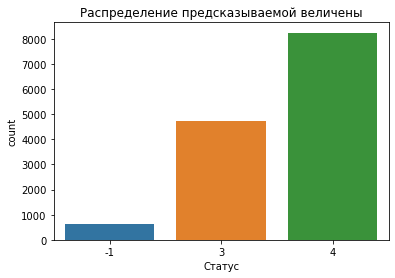

In [9]:
sns.countplot(x ="Статус" , data=df_train).set_title('Распределение предсказываемой величены');

In [10]:
df_train.Статус.value_counts().sort_values(ascending=True)

-1     614
 3    4721
 4    8249
Name: Статус, dtype: int64

- -1 – ушел в академический  отпуск: 614 человек
- 4 – закончил обучение: 4721 человек
- 3 – отчислен: 8249 человек

In [11]:
df_train['Год_Поступления'].value_counts().sort_index(ascending=True)

2001       1
2003       1
2004       1
2005       1
2007       5
2008       2
2009       8
2010      19
2011      46
2012    1394
2013    2070
2014    2290
2015    2353
2016    2271
2017    1460
2018    1147
2019     466
2020      48
2212       1
Name: Год_Поступления, dtype: int64

In [12]:
df_train.loc[df_train['Год_Поступления'] == 2212]

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
104,45077,11576,2212,Муж,СН,Английский язык,1991-07-22 00:00:00.000,No,No,0.0,0.0,No,No,No,0.0,1,1.0,No,0.0,0.0,0.0,25.0,43.0,3


Исправим опечатку в 2212 на 2012.

In [13]:
df_train['Год_Поступления'] = df_train['Год_Поступления'].replace(2212, 2012)

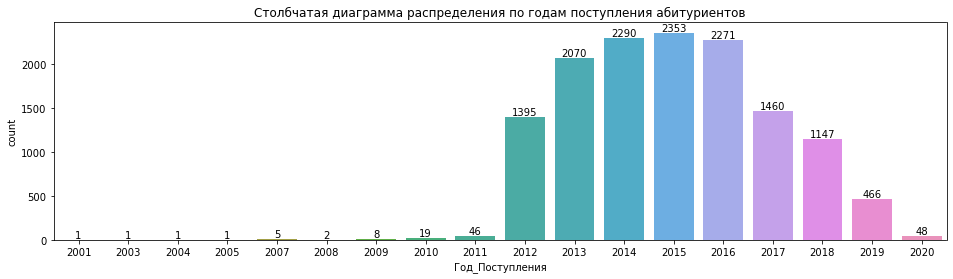

In [14]:
plt.figure(figsize=(16,4))
plt.title('Столбчатая диаграмма распределения по годам поступления абитуриентов')
ax = sns.countplot(data=df_train, x="Год_Поступления")
ax.bar_label(ax.containers[0]);

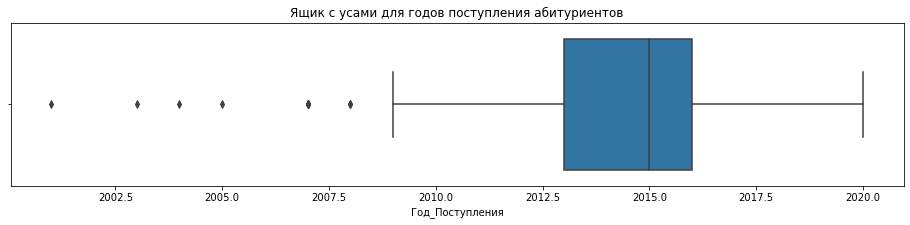

In [15]:
plt.figure(figsize=(16,3))
sns.boxplot(data=df_train, x="Год_Поступления").set_title('Ящик с усами для годов поступления абитуриентов');

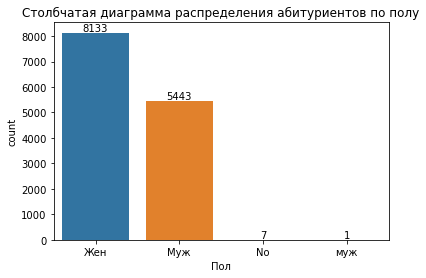

In [16]:
plt.title('Столбчатая диаграмма распределения абитуриентов по полу')
ax = sns.countplot(data=df_train, x="Пол")
ax.bar_label(ax.containers[0]);

Заменим некорректное значение.

In [17]:
df_train['Пол'] = df_train['Пол'].replace('муж', 'Муж')

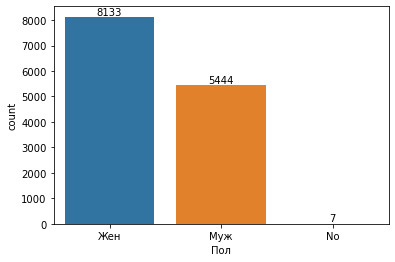

In [18]:
ax = sns.countplot(data=df_train, x="Пол")
ax.bar_label(ax.containers[0]);

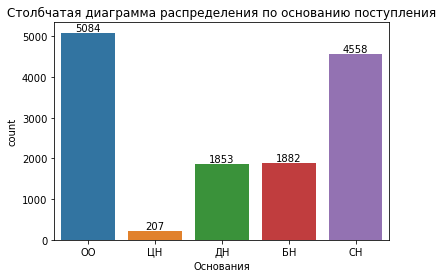

In [19]:
plt.title('Столбчатая диаграмма распределения по основанию поступления')
ax = sns.countplot(data=df_train, x="Основания")
ax.bar_label(ax.containers[0]);

- СН - специальный набор:     4558 человек
- ЦН - целевой набор:         207 человек
- БН - бюджетный набор:       1882 человека
- ОО - общие основания:       5084 человека
- ДН - дополнительный прием:  1853 человека

In [20]:
df_train['Изучаемый_Язык'].value_counts()

Английский язык                  10450
Немецкий язык                     2219
No                                 826
Французский язык                    54
Русский язык                        11
Иностранный язык (Английский)       10
Англиийский                         10
Иностранный язык (Немецкий)          4
Name: Изучаемый_Язык, dtype: int64

In [21]:
df_train.loc[df_train['Изучаемый_Язык'] == 'Русский язык']

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
690,56803,14810,2013,Муж,СН,Русский язык,1977-07-04 00:00:00.000,"ФГБОУ ВПО ""Алтайский государственный техническ...",г Барнаул,2003.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,26.0,67.0,4
1080,56392,17039,2007,Муж,СН,Русский язык,1975-07-05 00:00:00.000,No,No,0.0,0.0,Россия,Алтайский край,Барнаул г,0.0,1,1.0,Россия,0.0,0.0,0.0,26.0,38.0,4
1586,49408,15034,2013,Муж,ОО,Русский язык,1965-04-13 00:00:00.000,Павлодарский государственный педагогический ин...,г. Павлодар,2006.0,0.0,Казахстан,Восточно-Казахстанская обл,г. Павлодар,0.0,1,1.0,No,0.0,0.0,0.0,36.0,93.0,4
1613,50025,16900,2013,Муж,ОО,Русский язык,1994-12-05 00:00:00.000,СОШ №8 Хуросонский р-он,"Хуросонский р-он, Хатлонская обл.,Республика Т...",2013.0,0.0,Таджикистан,Хатлонская обл,Барнаул,1.0,1,1.0,Таджикистан,0.0,0.0,0.0,34.0,40.0,4
4258,56995,14816,2013,Жен,СН,Русский язык,1985-09-07 00:00:00.000,"НАЧОУ ВПО ""Современная гуманитарная академия"" ...",г.Москва,2008.0,0.0,Россия,Алтайский край,г. Бийск,0.0,0,0.0,Россия,0.0,0.0,0.0,26.0,77.0,4
7207,58054,16117,2013,Муж,СН,Русский язык,1986-06-01 00:00:00.000,"ГОУ ВПО ""АГТУ""",г. Барнаул Алтайский край,2008.0,0.0,Россия,Алтайский край,г. Бийск,0.0,0,0.0,Россия,0.0,0.0,0.0,26.0,65.0,4
9609,53075,12423,2012,Жен,ДН,Русский язык,1984-03-20 00:00:00.000,ГОУ ВПО АГУ,Барнаул,2006.0,0.0,Россия,Алтайский край,Новоалтайск,0.0,1,1.0,No,0.0,0.0,0.0,26.0,49.0,3
10569,50030,15434,2013,Муж,ОО,Русский язык,1995-11-07 00:00:00.000,СОШ №8 Хуросонский р-он,Хуросонский р-н,2013.0,0.0,Таджикистан,Хатлонская обл,Галлаобод джамоат,1.0,1,1.0,Таджикистан,0.0,1.0,0.0,30.0,71.0,3
11769,53146,14813,2012,Муж,СН,Русский язык,1983-05-15 00:00:00.000,ГОУ ВПО АГТУ им.Ползунова,Барнаул,2005.0,0.0,Россия,Алтайский край,Барнаул г,0.0,1,1.0,No,0.0,0.0,0.0,26.0,41.0,4
12059,56847,12407,2013,Жен,ДН,Русский язык,1979-10-01 00:00:00.000,"ФГБОУ ВПО ""Алтайский государственный университет""",Барнаул Алтайский края,2001.0,0.0,Россия,Алтайский край,г. Новоалтайск,0.0,0,0.0,Россия,0.0,0.0,0.0,26.0,58.0,3


Приведём разные вариации написания изучаемых языков к одной форме написания.

In [22]:
df_train['Изучаемый_Язык'] = df_train['Изучаемый_Язык'].replace({'Иностранный язык (Английский)':'Английский язык', 
                                                                 'Англиийский':'Английский язык', 
                                                                 'Иностранный язык (Немецкий)':'Немецкий язык', 
                                                                 'Русский язык':'No'})

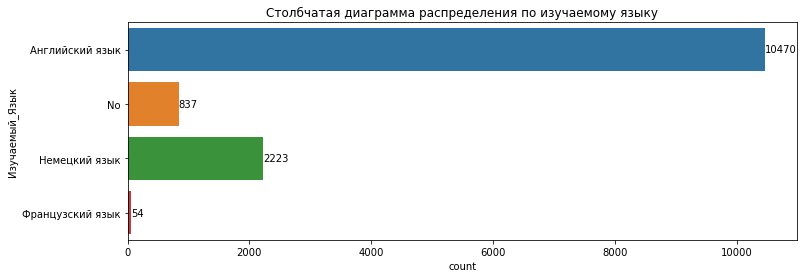

In [23]:
plt.figure(figsize=(12,4))
plt.title('Столбчатая диаграмма распределения по изучаемому языку')
ax = sns.countplot(data=df_train, y="Изучаемый_Язык")
ax.bar_label(ax.containers[0]);

In [24]:
# df_train['Дата_Рождения'] = pd.to_datetime(df_train['Дата_Рождения'], format='%Y.%m.%d')

In [25]:
df_train['Год_Рождения'] = pd.to_datetime(df_train['Дата_Рождения'], format='%Y.%m.%d').dt.year

In [26]:
df_train['Возраст_поступления'] = df_train['Год_Поступления'] - pd.to_datetime(df_train['Дата_Рождения'], 
                                                                               format='%Y.%m.%d').dt.year

In [27]:
df_train.head()

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус,Год_Рождения,Возраст_поступления
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3,1998,17
1,63306,14895,2010,Муж,ЦН,No,1992-04-18 00:00:00.000,No,No,0.0,0.0,Россия,Алтайский край,Барнаул г,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4,1992,18
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,0.0,Россия,Алтайский край,Алтайское с,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4,1999,18
3,81661,19838,2017,Жен,БН,Английский язык,1994-12-08 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,0.0,Россия,Алтайский край,г. Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,35.0,74.000,4,1994,23
4,81509,19803,2017,Жен,БН,Английский язык,1995-06-28 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,0.0,Россия,Алтайский край,г. Барнаул,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,53.000,4,1995,22


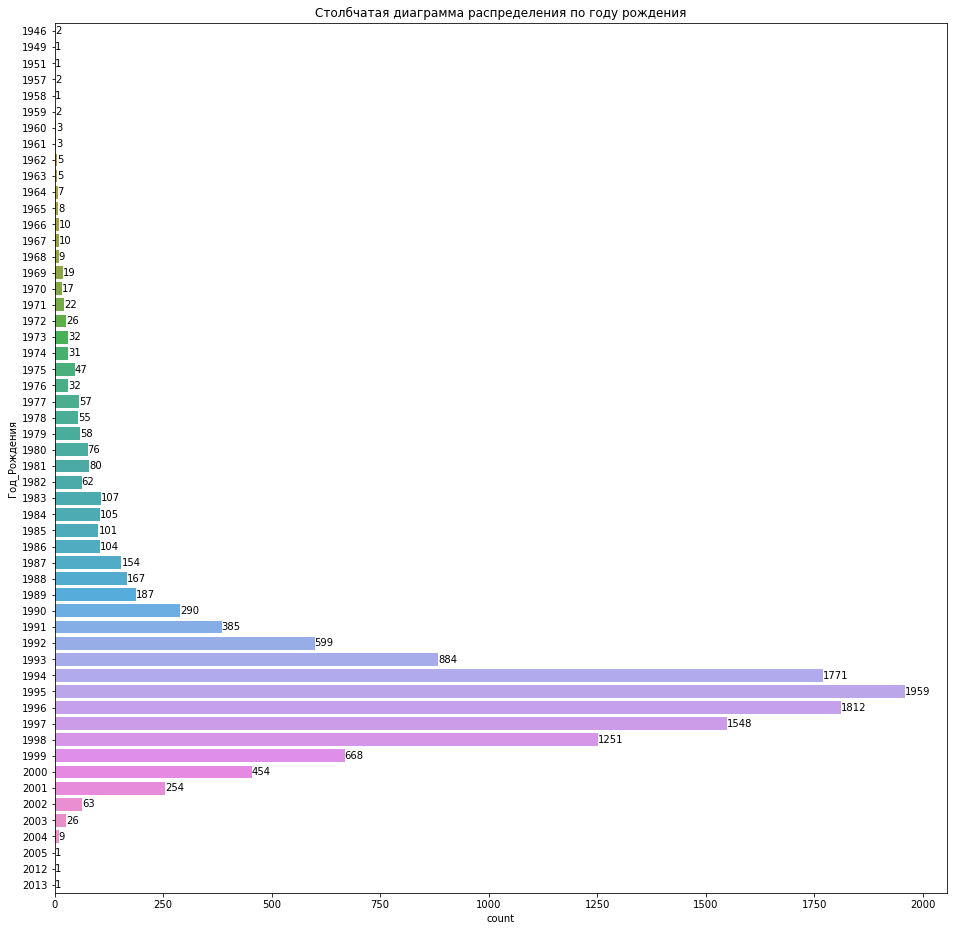

In [28]:
plt.figure(figsize=(16,16))
plt.title('Столбчатая диаграмма распределения по году рождения')
ax = sns.countplot(data=df_train, y="Год_Рождения")
ax.bar_label(ax.containers[0]);

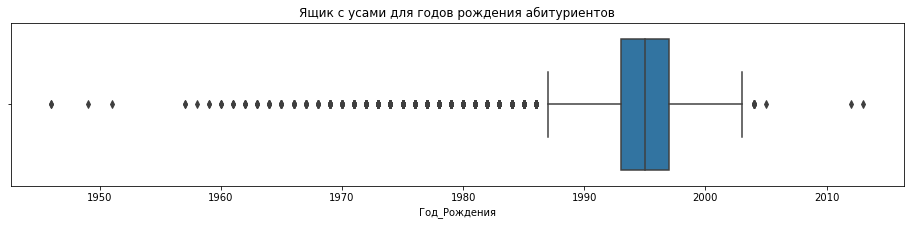

In [29]:
plt.figure(figsize=(16,3))
sns.boxplot(data=df_train, x="Год_Рождения").set_title('Ящик с усами для годов рождения абитуриентов');

Подавляющее количество абитуриентов родились в период с конца 80х по начало 2000х годов.

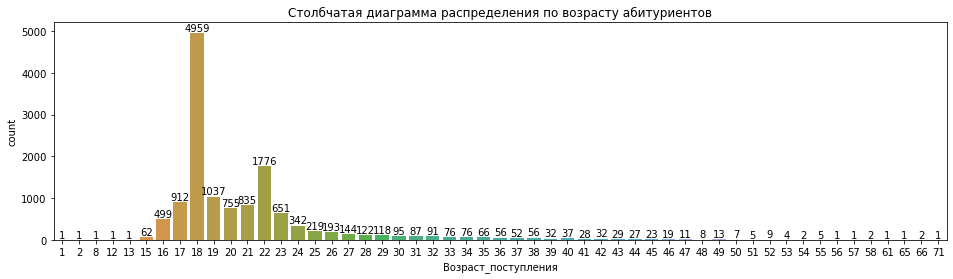

In [30]:
plt.figure(figsize=(16,4))
plt.title('Столбчатая диаграмма распределения по возрасту абитуриентов')
ax = sns.countplot(data=df_train, x="Возраст_поступления")
ax.bar_label(ax.containers[0]);

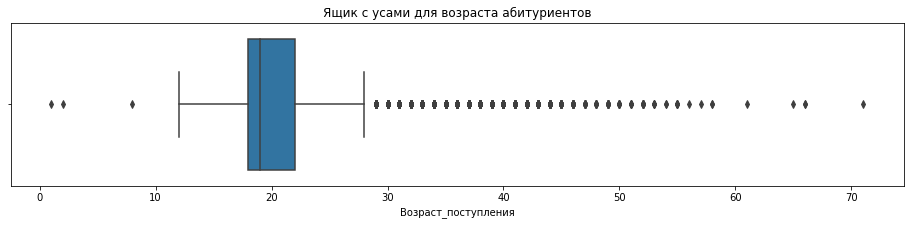

In [31]:
plt.figure(figsize=(16,3))
sns.boxplot(data=df_train, x="Возраст_поступления").set_title('Ящик с усами для возраста абитуриентов');

In [32]:
df_train['Уч_Заведение'].value_counts()

ФГБОУ ВО Алтайский государственный университет                                   1359
No                                                                               1233
ФГБОУ ВПО "Алтайский государственный университет"                                1025
ФГБОУ ВПО Алтайский государственный университет                                   113
ФГБОУ ВО Алтайский государственный технический университет им. И.И. Ползунова      88
                                                                                 ... 
Рубцовский сельскохозяйственный техникум                                            1
МКОУ Самсоновская СОШ                                                               1
ГОУ СПО "Рубцовское государственное музыкальное училище"                            1
ФГБОУ ВПО "Смоленский государственный университет"                                  1
МКОУ "Георгиевская СОШ"                                                             1
Name: Уч_Заведение, Length: 3647, dtype: int64

In [33]:
df_train['Уч_Заведение'].value_counts().head(10)

ФГБОУ ВО Алтайский государственный университет                                      1359
No                                                                                  1233
ФГБОУ ВПО "Алтайский государственный университет"                                   1025
ФГБОУ ВПО Алтайский государственный университет                                      113
ФГБОУ ВО Алтайский государственный технический университет им. И.И. Ползунова         88
Алтайский государственный университет                                                 79
ФГБОУ ВПО "Алтайский государственный технический университет им. И.И. Ползунова"      62
ГОУ ВПО "Алтайский государственный университет"                                       58
МБОУ "Гимназия №42"                                                                   57
МБОУ "Лицей №112"                                                                     55
Name: Уч_Заведение, dtype: int64

Столбец 'Уч_Заведение' имеет 3647 уникальных значений по причине опции самостоятельного заполнения данной графы абитуриентами. При более подробном рассмотрении можно увидеть, что помимо одного и того же учебного заведения в разных вариациях написания имеется большое количество уникальных или редко встречающихся наименований.

In [34]:
df_train = df_train.fillna(0)

In [35]:
df_train.head(3)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус,Год_Рождения,Возраст_поступления
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,0.0,Россия,Алтайский край,Барнаул г,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3,1998,17
1,63306,14895,2010,Муж,ЦН,No,1992-04-18 00:00:00.000,No,No,0.0,0.0,Россия,Алтайский край,Барнаул г,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4,1992,18
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,0.0,Россия,Алтайский край,Алтайское с,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4,1999,18


In [36]:
df_train['Где_Находится_УЗ'].value_counts()

Алтайский край, Барнаул г                         2413
Алтайский край, г. Барнаул                        1919
No                                                1381
Россия, Алтайский край, г Барнаул                 1264
Алтайский край, Бийск г                            248
                                                  ... 
с. Черёмушкино, Залесовского района                  1
г. Шемонаиха ВКО, реапублика Казахстан               1
Россия, Приморский край, г Находка                   1
Алтайский край, Бийс г                               1
Алтайский край, Ребрихинский р-н, Георгиевка с       1
Name: Где_Находится_УЗ, Length: 2111, dtype: int64

Также как и в столбце 'Уч_Заведение', в солбце 'Где_Находится_УЗ' помимо вариаций написания одного и того же места имеется много уникальных и редко встречающихся значений.

In [37]:
df_train['Год_Окончания_УЗ'] = df_train['Год_Окончания_УЗ'].astype(int)

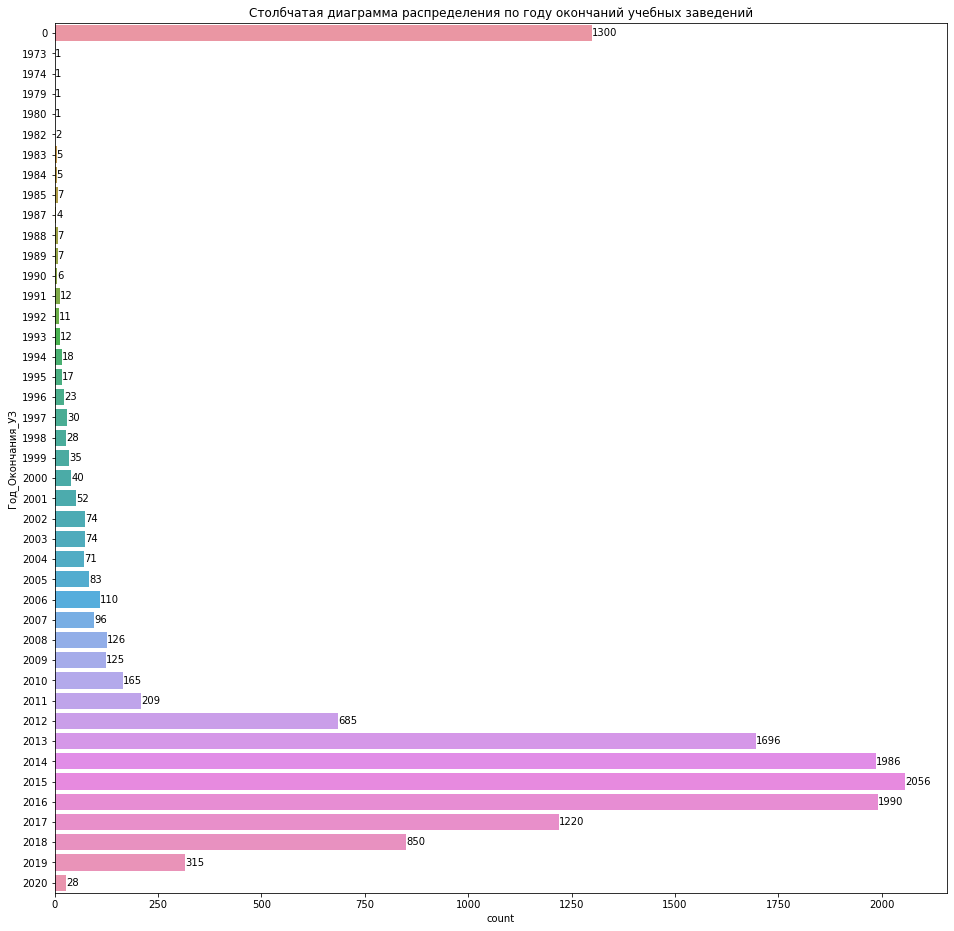

In [38]:
plt.figure(figsize=(16,16))
plt.title('Столбчатая диаграмма распределения по году окончаний учебных заведений')
ax = sns.countplot(data=df_train, y="Год_Окончания_УЗ")
ax.bar_label(ax.containers[0]);

In [39]:
df_train['Пособие'].value_counts()

0.0    13584
Name: Пособие, dtype: int64

Признак Пособие можно удалить тк он полностью представлен одним объектом.

Обработаем сотлбец страны постоянного проживания.

In [40]:
df_train['Страна_ПП'].value_counts()

Россия                    12435
Казахстан                   415
No                          347
Китай                       148
Таджикистан                 118
РОССИЯ                       37
Кыргызстан                   32
Киргизия                     21
Кыргызия                      6
Казахстан Респ                3
Казахстан респ                3
Росссия                       2
Кыргызская Республика         2
Армения                       2
Таджикистан Респ              2
Туркменистан                  2
Монголия                      2
Республика Таджикистан        1
Республика Казахстан          1
Казахстан ВКО                 1
Нигерия                       1
Франция                       1
Узбекистан                    1
Украина                       1
Name: Страна_ПП, dtype: int64

Приведём категории к единому формату написания.

In [41]:
df_train['Страна_ПП'] = df_train['Страна_ПП'].replace({'РОССИЯ':'Россия', 
                                                       'Росссия':'Россия', 
                                                       'Кыргызстан':'Киргизия', 
                                                       'Кыргызия':'Киргизия', 
                                                       'Кыргызская Республика':'Киргизия', 
                                                       'Казахстан Респ':'Казахстан', 
                                                       'Казахстан респ':'Казахстан', 
                                                       'Республика Казахстан':'Казахстан', 
                                                       'Казахстан ВКО':'Казахстан', 
                                                       'Таджикистан Респ':'Таджикистан', 
                                                       'Республика Таджикистан':'Таджикистан'})

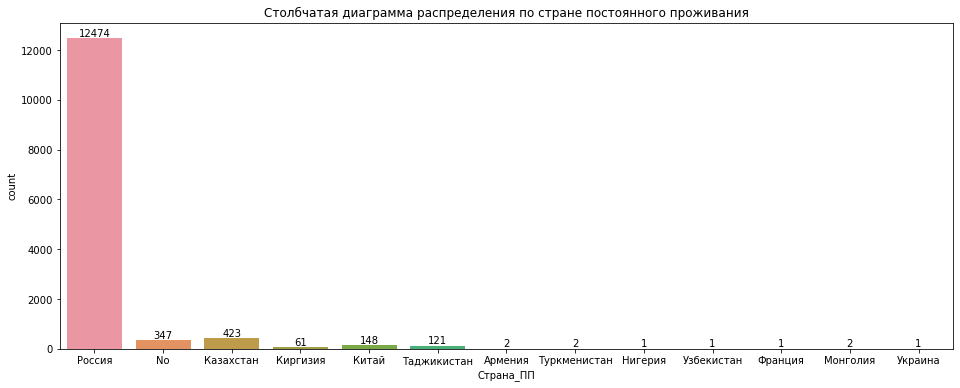

In [42]:
plt.figure(figsize=(16,6))
plt.title('Столбчатая диаграмма распределения по стране постоянного проживания')
ax = sns.countplot(data=df_train, x="Страна_ПП")
ax.bar_label(ax.containers[0]);

In [43]:
df_train['Регион_ПП'].value_counts()

Алтайский край                11492
No                              618
Алтай Респ                      204
Республика Алтай                203
Восточно-Казахстанская обл      193
                              ...  
Баткенская область                1
Желал-Абадская обл                1
Магаданская Обл                   1
Джалал-Абадская                   1
Шэньси провинция                  1
Name: Регион_ПП, Length: 193, dtype: int64

In [44]:
df_train['Город_ПП'].value_counts()

Барнаул г         3735
г. Барнаул        1727
Барнаул           1174
No                 443
Бийск г            246
                  ... 
Марушка              1
с. Гилево            1
Чернышевский п       1
Кисилёвск г          1
Шила с               1
Name: Город_ПП, Length: 1766, dtype: int64

Ситцация с регионом и местом постоянного проживания эквивалентна выводам по учебным заведениям и местам их нахождения.

In [45]:
df_train['Общежитие'] = df_train['Общежитие'].astype(int)

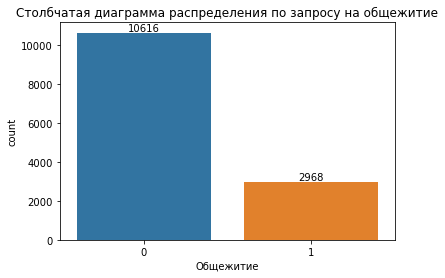

In [46]:
plt.title('Столбчатая диаграмма распределения по запросу на общежитие')
ax = sns.countplot(data=df_train, x="Общежитие")
ax.bar_label(ax.containers[0]);

- 0 - абитуриенту не требуется общежитие 
- 1 - абитуриенту требуется общежитие 

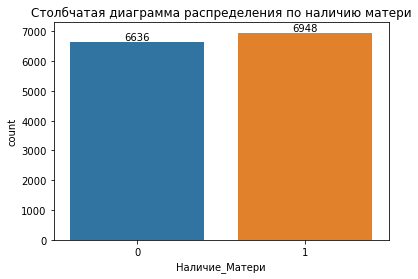

In [47]:
plt.title('Столбчатая диаграмма распределения по наличию матери')
ax = sns.countplot(data=df_train, x="Наличие_Матери")
ax.bar_label(ax.containers[0]);

In [48]:
df_train['Наличие_Отца'] = df_train['Наличие_Отца'].astype(int)

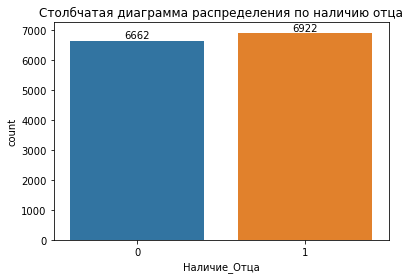

In [49]:
plt.title('Столбчатая диаграмма распределения по наличию отца')
ax = sns.countplot(data=df_train, x="Наличие_Отца")
ax.bar_label(ax.containers[0]);

In [50]:
df_train['Страна_Родители'].value_counts()

Россия                    12239
Казахстан                   514
No                          458
Китай                       147
Таджикистан                 133
Кыргызстан                   37
Киргизия                     31
Туркменистан                  5
Узбекистан                    3
Армения                       3
Кыргызская Республика         3
Республика Таджикистан        2
Монголия                      2
Республика Молдова            1
Нигерия                       1
Германия                      1
Республика Казахстан          1
казахстан                     1
Украина                       1
КНР                           1
Name: Страна_Родители, dtype: int64

Приведём к единому формату написания в столбце 'Страна_Родители'.

In [51]:
df_train['Страна_Родители'] = df_train['Страна_Родители'].replace({'Кыргызстан':'Киргизия', 
                                                                   'Кыргызская Республика':'Киргизия', 
                                                                   'Республика Казахстан':'Казахстан', 
                                                                   'казахстан':'Казахстан', 
                                                                   'КНР':'Китай', 
                                                                   'Республика Молдова':'Молдавия',
                                                                   'Республика Таджикистан':'Таджикистан'})

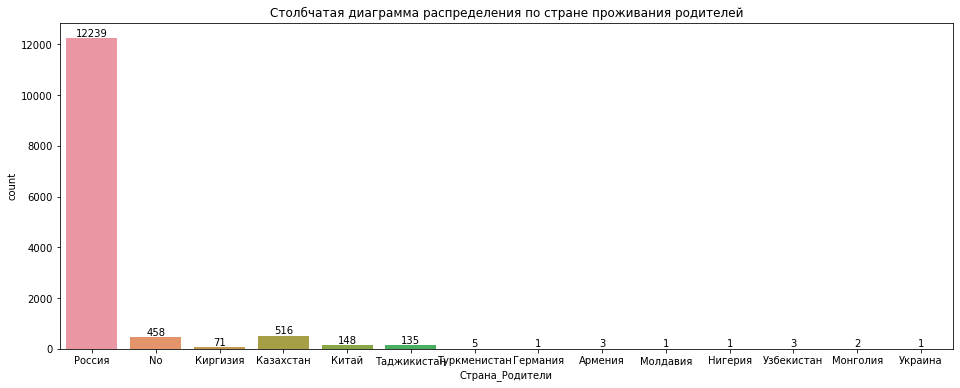

In [52]:
plt.figure(figsize=(16,6))
plt.title('Столбчатая диаграмма распределения по стране проживания родителей')
ax = sns.countplot(data=df_train, x="Страна_Родители")
ax.bar_label(ax.containers[0]);

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13584 non-null  int64  
 1   Код_группы           13584 non-null  int64  
 2   Год_Поступления      13584 non-null  int64  
 3   Пол                  13584 non-null  object 
 4   Основания            13584 non-null  object 
 5   Изучаемый_Язык       13584 non-null  object 
 6   Дата_Рождения        13584 non-null  object 
 7   Уч_Заведение         13584 non-null  object 
 8   Где_Находится_УЗ     13584 non-null  object 
 9   Год_Окончания_УЗ     13584 non-null  int32  
 10  Пособие              13584 non-null  float64
 11  Страна_ПП            13584 non-null  object 
 12  Регион_ПП            13584 non-null  object 
 13  Город_ПП             13584 non-null  object 
 14  Общежитие            13584 non-null  int32  
 15  Наличие_Матери       13584 non-null 

In [54]:
df_train['Опекунство'] = df_train['Опекунство'].astype(int)

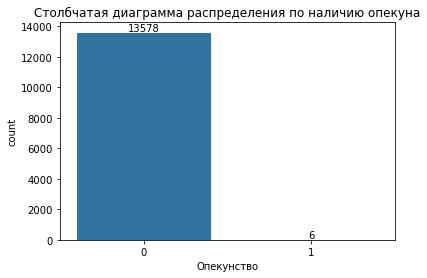

In [55]:
plt.title('Столбчатая диаграмма распределения по наличию опекуна')
ax = sns.countplot(data=df_train, x="Опекунство")
ax.bar_label(ax.containers[0]);

In [56]:
df_train['Село'] = df_train['Село'].astype(int)

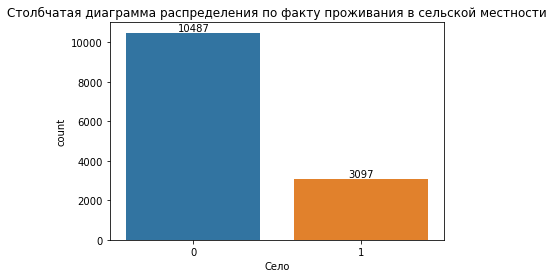

In [57]:
plt.title('Столбчатая диаграмма распределения по факту проживания в сельской местности')
ax = sns.countplot(data=df_train, x="Село")
ax.bar_label(ax.containers[0]);

In [58]:
df_train['Иностранец'] = df_train['Иностранец'].astype(int)

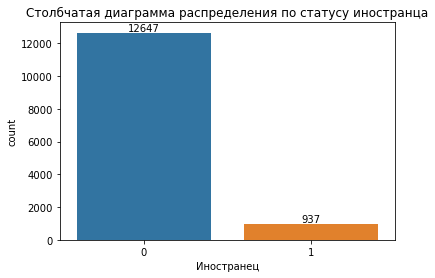

In [59]:
plt.title('Столбчатая диаграмма распределения по статусу иностранца')
ax = sns.countplot(data=df_train, x="Иностранец")
ax.bar_label(ax.containers[0]);

937 человек являются иностранцами.

In [60]:
df_train['КодФакультета'].value_counts()

26.0    2776
25.0    2171
41.0    1485
51.0    1109
34.0     960
24.0     692
27.0     679
28.0     662
31.0     622
35.0     547
40.0     471
36.0     447
30.0     435
48.0     234
45.0      91
47.0      84
49.0      76
46.0      26
53.0      15
37.0       2
Name: КодФакультета, dtype: int64

In [61]:
df_train['КодФакультета'] = df_train['КодФакультета'].astype(int)

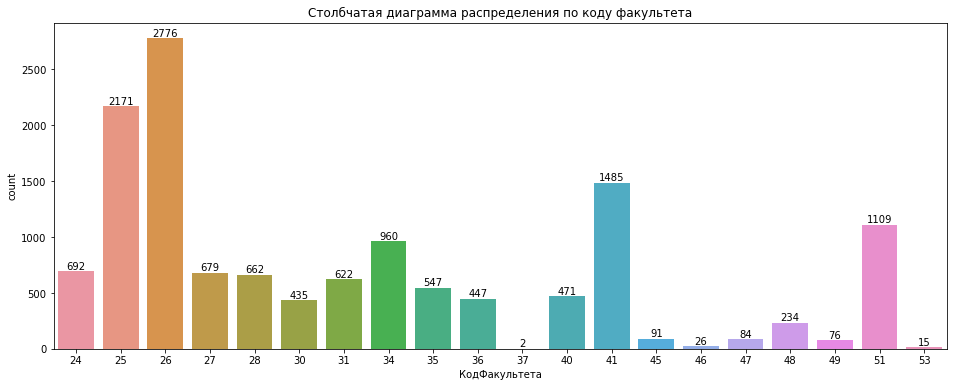

In [62]:
plt.figure(figsize=(16,6))
plt.title('Столбчатая диаграмма распределения по коду факультета')
ax = sns.countplot(data=df_train, x="КодФакультета")
ax.bar_label(ax.containers[0]);

In [63]:
df_train['СрБаллАттестата'].value_counts().sort_index(ascending=False)

5000.000     3
4947.000     1
4866.000     1
4800.000     1
4769.000     2
            ..
3.111        1
3.100        2
3.066        2
3.000       16
0.000       10
Name: СрБаллАттестата, Length: 462, dtype: int64

Среди данных по среднему баллу аттестата абитуриентов имеются значения среднего балла выше 100. Рассмотрим подробнее данные об этих абитуриентах.

In [64]:
df_train.loc[df_train['СрБаллАттестата'] > 100]

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Страна_ПП,Регион_ПП,Город_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус,Год_Рождения,Возраст_поступления
311,66693,18441,2014,Жен,ОО,Английский язык,1997-01-07 00:00:00.000,"КГБО школа-интернат лицей-интернат ""Алтайский ...","Алтайский край, Барнаул г",2014,0.0,Россия,Алтайский край,г. Барнаул,0,0,0,Россия,0,0,0,26,4666.0,4,1997,17
342,80038,17960,2014,Жен,ДН,Английский язык,1998-05-01 00:00:00.000,"МБОУ ""Гимназия № 8"" города Рубцовска Алтайског...",No,2014,0.0,No,No,,0,1,1,Россия,0,0,0,49,3250.0,3,1998,16
411,74472,17527,2016,Жен,ОО,Английский язык,1993-01-13 00:00:00.000,МБОУ Вечерняя (сменная) школа №27,"Россия, Новосибирская обл, г Новосибирск",2014,0.0,Россия,Алтайский край,Барнаул,0,1,1,Россия,0,0,0,27,4866.0,3,1993,23
730,85029,20238,2018,Муж,СН,Немецкий язык,1999-07-25 00:00:00.000,МБОУ Дегтярская СОШ,"Алтайский край, Немецкий Национальный р-н, Дег...",2018,0.0,Россия,Алтайский край,Дегтярка с,0,1,1,Россия,0,1,0,51,4533.0,3,1999,19
1269,52248,12142,2013,Жен,ОО,Английский язык,1995-08-07 00:00:00.000,"МБОУ ""Павловская СОШ""",Угловский р-н Алтайский край,2012,0.0,Россия,Алтайский край,Павловка с,0,0,0,Россия,0,1,0,41,4200.0,3,1995,18
1875,79775,17981,2014,Жен,ДН,Английский язык,1995-12-20 00:00:00.000,"МБОУ ""Средняя общеобразовательная школа №22"" г...",No,2014,0.0,No,No,,0,1,1,Россия,0,0,0,49,4214.0,3,1995,19
1956,77545,18607,2016,Жен,СН,Английский язык,1996-04-28 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Россия, Алтайский край, г Барнаул",2016,0.0,Россия,Алтайский край,Барнаул,0,1,1,Россия,0,0,0,34,4153.0,3,1996,20
1981,78636,20759,2016,Жен,ДН,Английский язык,1996-09-02 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Россия, Алтайский край, г Барнаул",2016,0.0,Россия,Алтайский край,Рубцовск,0,1,1,Россия,0,0,0,26,4333.0,4,1996,20
2263,74624,20715,2016,Жен,ДН,Английский язык,1996-11-20 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Россия, Алтайский край, г Барнаул",2016,0.0,Россия,Алтайский край,Барнаул,0,1,1,Россия,0,0,0,51,4000.0,4,1996,20
2388,77543,18608,2016,Жен,СН,Английский язык,1996-08-22 00:00:00.000,ФГБОУ ВПО Алтайский государственный университет,"Россия, Алтайский край, г Барнаул",2016,0.0,Россия,Алтайский край,Барнаул,0,1,1,Россия,0,0,0,34,3769.0,3,1996,20


Возраст абитуриентов с аномальным значением среднего балла составляет от 16 до 23 лет. Это абитуриенты, которые сдавали ЕГЭ. Исправим аномальные значения среднего балла в соответствии с этим заключением.

In [65]:
def grad_correct(row):
    """Функция корректировки ошибочных значений среднего балла аттестата"""
    points = row['СрБаллАттестата']
    if 100 < points < 1000:
        return points/10
    if points > 1000:
        return points/100
    else:
        return points

In [66]:
df_train['СрБаллАттестата'] = df_train.apply(grad_correct, axis=1)

In [67]:
df_train['СрБаллАттестата'].value_counts().sort_index(ascending=False)

100.000    86
99.000     30
98.000     71
97.000     87
96.000     85
           ..
3.111       1
3.100       2
3.066       2
3.000      16
0.000      10
Name: СрБаллАттестата, Length: 455, dtype: int64

In [68]:
df_train['СрБаллАттестата'] = df_train['СрБаллАттестата'].round(1)

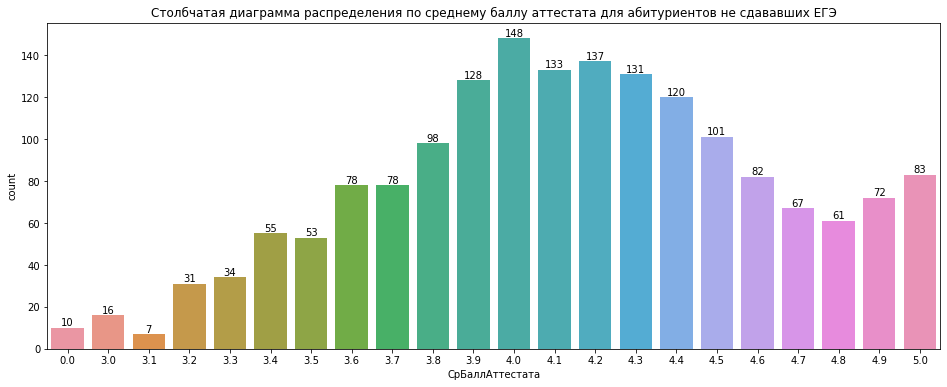

In [69]:
plt.figure(figsize=(16,6))
plt.title('Столбчатая диаграмма распределения по среднему баллу аттестата для абитуриентов не сдававших ЕГЭ')
ax = sns.countplot(data=df_train.loc[df_train['СрБаллАттестата'] <= 5], x="СрБаллАттестата")
ax.bar_label(ax.containers[0]);

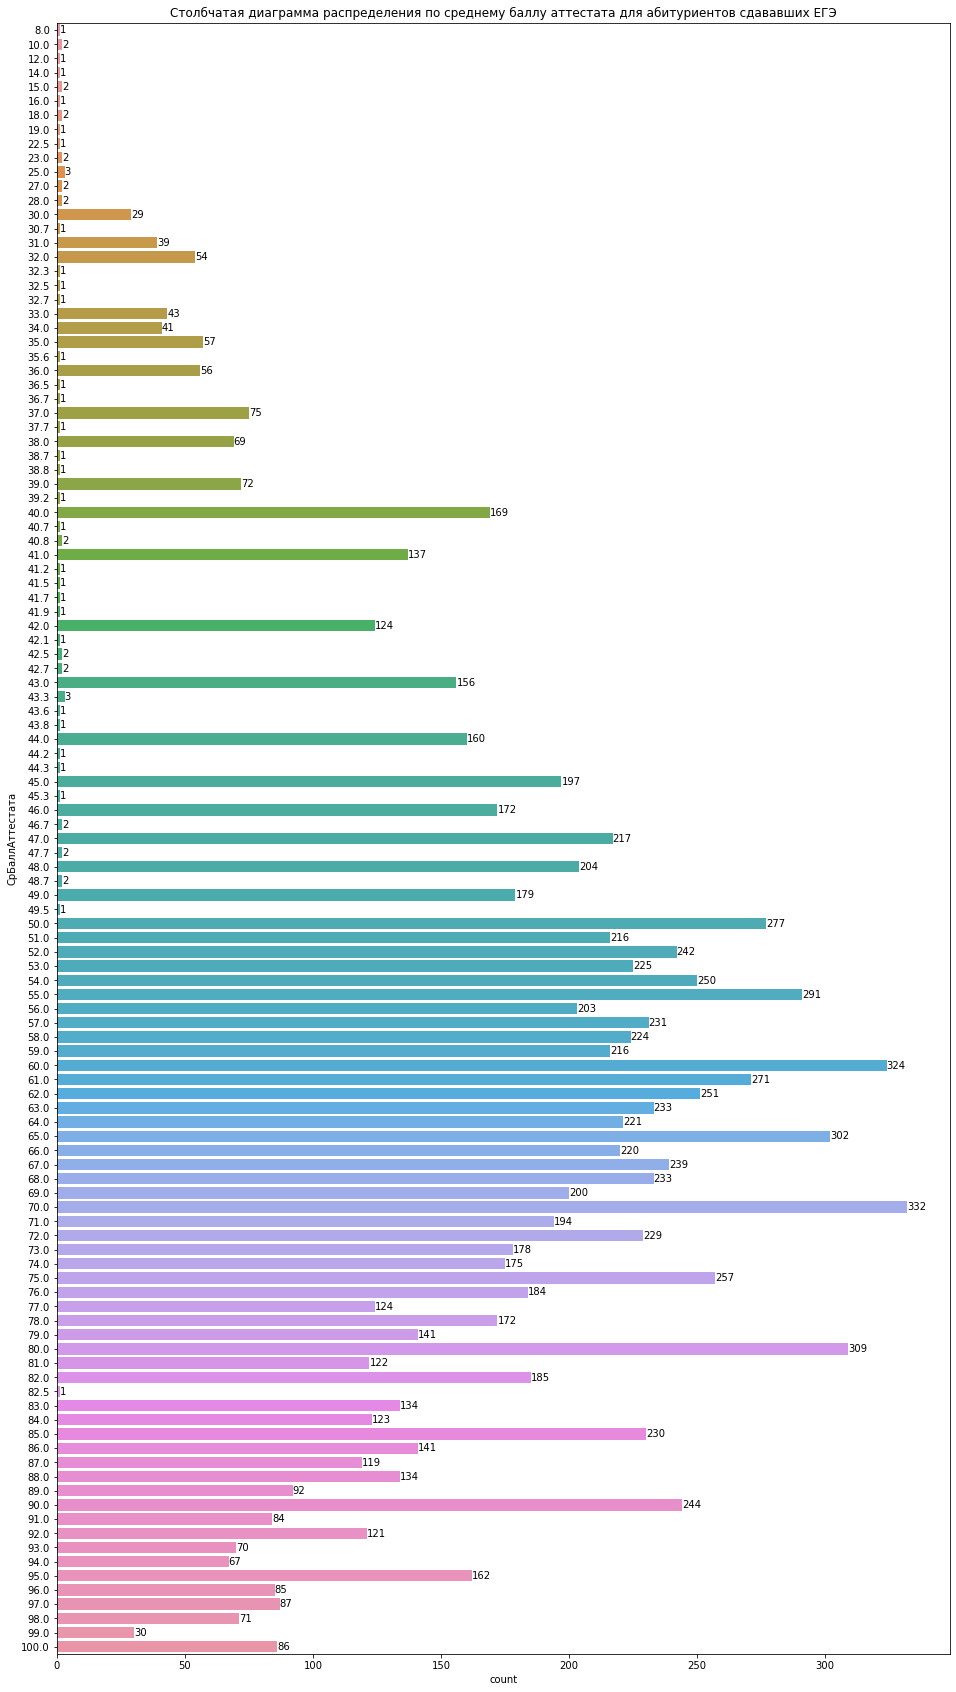

In [70]:
plt.figure(figsize=(16,30))
plt.title('Столбчатая диаграмма распределения по среднему баллу аттестата для абитуриентов сдававших ЕГЭ')
ax = sns.countplot(data=df_train.loc[df_train['СрБаллАттестата'] > 5], y="СрБаллАттестата")
ax.bar_label(ax.containers[0]);

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13584 non-null  int64  
 1   Код_группы           13584 non-null  int64  
 2   Год_Поступления      13584 non-null  int64  
 3   Пол                  13584 non-null  object 
 4   Основания            13584 non-null  object 
 5   Изучаемый_Язык       13584 non-null  object 
 6   Дата_Рождения        13584 non-null  object 
 7   Уч_Заведение         13584 non-null  object 
 8   Где_Находится_УЗ     13584 non-null  object 
 9   Год_Окончания_УЗ     13584 non-null  int32  
 10  Пособие              13584 non-null  float64
 11  Страна_ПП            13584 non-null  object 
 12  Регион_ПП            13584 non-null  object 
 13  Город_ПП             13584 non-null  object 
 14  Общежитие            13584 non-null  int32  
 15  Наличие_Матери       13584 non-null 

Удалим не нужные в дальнейшем для исследования столбцы.

In [72]:
df_train_prepared = df_train.drop(['ID', 
                                   'Дата_Рождения', 
                                   'Уч_Заведение', 
                                   'Где_Находится_УЗ', 
                                   'Пособие', 
                                   'Регион_ПП', 
                                   'Город_ПП'], axis=1)

In [73]:
# sns.pairplot(df_train_prepared, hue='Статус');

In [74]:
# проверка
# df_train_prepared.info()

Для исследования корреляций в датасете с категориальными признаками, воспользуемся корреляцией $\phi_K$.

In [75]:
phik_corr = df_train_prepared.phik_matrix()
phik_corr.round(2)

interval columns not set, guessing: ['Код_группы', 'Год_Поступления', 'Год_Окончания_УЗ', 'Общежитие', 'Наличие_Матери', 'Наличие_Отца', 'Опекунство', 'Село', 'Иностранец', 'КодФакультета', 'СрБаллАттестата', 'Статус', 'Год_Рождения', 'Возраст_поступления']


,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Окончания_УЗ,Страна_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус,Год_Рождения,Возраст_поступления
Код_группы,1.00,0.64,0.09,0.63,0.24,0.52,0.17,0.15,0.50,0.50,0.21,0.04,0.12,0.14,0.22,0.28,0.60,0.43,0.10
Год_Поступления,0.64,1.00,0.09,0.31,0.39,0.65,0.23,0.15,0.71,0.71,0.29,0.07,0.14,0.12,0.19,0.17,0.54,0.36,0.35
Пол,0.09,0.09,1.00,0.05,0.05,0.01,0.23,0.03,0.00,0.00,0.27,0.00,0.03,0.06,0.36,0.12,0.33,0.05,0.06
Основания,0.63,0.31,0.05,1.00,0.09,0.13,0.15,0.15,0.17,0.17,0.16,0.00,0.06,0.03,0.43,0.46,0.23,0.16,0.14
Изучаемый_Язык,0.24,0.39,0.05,0.09,1.00,0.88,0.26,0.16,0.32,0.32,0.27,0.00,0.34,0.15,0.22,0.10,0.06,0.15,0.15
Год_Окончания_УЗ,0.52,0.65,0.01,0.13,0.88,1.00,0.41,0.19,0.44,0.44,0.41,0.00,0.13,0.10,0.18,0.16,0.07,0.12,0.19
Страна_ПП,0.17,0.23,0.23,0.15,0.26,0.41,1.00,0.35,0.17,0.17,0.96,0.00,0.12,0.82,0.27,0.20,0.15,0.06,0.00
Общежитие,0.15,0.15,0.03,0.15,0.16,0.19,0.35,1.00,0.10,0.11,0.45,0.00,0.29,0.48,0.25,0.11,0.02,0.27,0.27
Наличие_Матери,0.50,0.71,0.00,0.17,0.32,0.44,0.17,0.10,1.00,1.00,0.20,0.02,0.16,0.03,0.13,0.10,0.03,0.17,0.07
Наличие_Отца,0.50,0.71,0.00,0.17,0.32,0.44,0.17,0.11,1.00,1.00,0.20,0.02,0.16,0.03,0.13,0.10,0.03,0.17,0.07


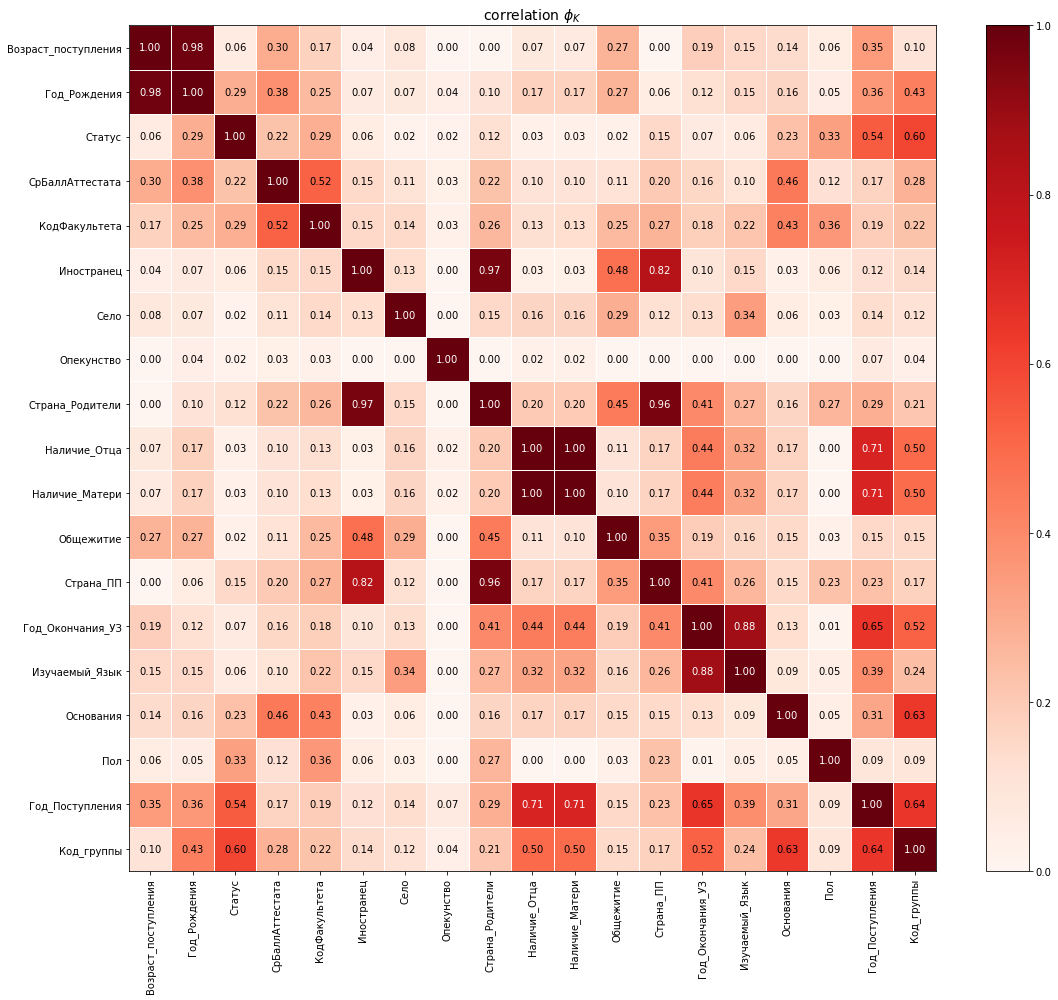

In [76]:
# построим матрицу корреляции
plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map="Reds", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(16, 14))
plt.tight_layout()

Имеются высокая корреляция между признаками Иностранец (является ли абитуриент иностранцем) со страной постоянного проживания и постоянного проживания родителей. А также годом рождения с созданным признаком Возраст поступления и наличием отца с наличием матери. С признаком Опекунство полностью отсутствуют корреляции.

In [77]:
# вывод на экран данных об абитуриентах, у которых есть опекун
df_train_prepared.query('Опекунство==1')

,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Окончания_УЗ,Страна_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус,Год_Рождения,Возраст_поступления
181,21881,2019,Муж,ОО,Английский язык,2018,Россия,0,0,0,Россия,1,0,0,25,57.0,-1,2000,19
3013,21650,2019,Жен,ОО,Английский язык,2019,Россия,1,0,0,Россия,1,0,0,46,56.0,3,2001,18
8222,14953,2012,Жен,ОО,Немецкий язык,2012,Россия,0,0,0,Россия,1,0,0,34,53.0,4,1994,18
9707,12013,2013,Муж,ОО,Английский язык,2011,Россия,1,0,0,Россия,1,0,0,34,49.0,3,1994,19
11620,22123,2019,Жен,СН,Английский язык,2019,Россия,0,0,0,Россия,1,1,0,36,53.0,3,2000,19
12157,21722,2019,Жен,СН,Английский язык,2016,Россия,0,0,0,Россия,1,0,0,26,58.0,-1,1999,20


Посмотрим на данные абитуриентов с аномально низкими значениями результатов экзаменов ЕГЭ.

In [78]:
df_train_prepared.query('5 < СрБаллАттестата < 30')

,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Окончания_УЗ,Страна_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус,Год_Рождения,Возраст_поступления
252,19787,2016,Муж,БН,Английский язык,2016,Россия,0,1,1,Россия,0,0,1,25,25.0,4,1990,26
626,18077,2013,Жен,ОО,Английский язык,2013,Россия,1,0,0,Россия,0,0,0,25,27.0,4,1995,18
728,18077,2013,Жен,ОО,Английский язык,2013,Россия,1,0,0,Россия,0,1,0,25,16.0,4,1995,18
827,15100,2012,Муж,ОО,Английский язык,0,Россия,0,1,1,Россия,0,0,0,41,25.0,4,1990,22
1379,16863,2013,Жен,ОО,Немецкий язык,2013,Россия,1,0,0,Россия,0,0,0,25,19.0,4,1996,17
1650,21179,2018,Муж,ДН,Английский язык,2018,Россия,1,1,1,Россия,0,0,0,25,28.0,4,1996,22
2739,11801,2012,Муж,ЦН,No,2012,Россия,0,1,1,Россия,0,0,0,25,28.0,3,1990,22
3391,16863,2013,Муж,ОО,Английский язык,2013,Россия,0,0,0,Россия,0,0,0,25,8.0,4,1995,18
4038,11941,2012,Жен,ДН,Английский язык,2012,Россия,0,1,1,No,0,0,0,25,15.0,3,1991,21
4753,11950,2012,Муж,ДН,Английский язык,2010,Россия,0,1,1,No,0,0,0,25,23.0,3,1984,28


В связи с тем что в данные о среднем балле аттестата представлены как оценками по пятибалльной шкале, так и результатами ЕГЭ, их необходимо нормализовать приведением к единой шкале.

In [79]:
# найдём минимальные и максимальные значения средних баллов обычного экзамена и ЕГЭ
max_use = max(df_train_prepared.query('5 < СрБаллАттестата')['СрБаллАттестата'])
min_use = min(df_train_prepared.query('5 < СрБаллАттестата')['СрБаллАттестата'])
max_regular = max(df_train_prepared.query('СрБаллАттестата <= 5')['СрБаллАттестата'])
min_regular = min(df_train_prepared.query('0 < СрБаллАттестата <= 5')['СрБаллАттестата'])
print(f'Максимальный балл на ЕГЭ:{max_use}')
print(f'Минимальный балл на ЕГЭ:{min_use}')
print(f'Максимальный балл не на ЕГЭ:{max_regular}')
print(f'Минимальный балл не на ЕГЭ:{min_regular}')

Максимальный балл на ЕГЭ:100.0
Минимальный балл на ЕГЭ:8.0
Максимальный балл не на ЕГЭ:5.0
Минимальный балл не на ЕГЭ:3.0


In [80]:
def grad_norm(row):
    """Функция, нормализующая средние баллы абитуриентов"""
    points = row['СрБаллАттестата']
    if 5 < points:
        return (points - min_use)/(max_use - min_use)
    else:
        return (points - min_regular)/(max_regular - min_regular)

In [81]:
df_train_prepared['СрБаллАттестата'] = df_train_prepared.apply(grad_norm, axis=1)

In [82]:
df_train_prepared['СрБаллАттестата'] = round(df_train_prepared['СрБаллАттестата']*100)
df_train_prepared['СрБаллАттестата'] = df_train_prepared['СрБаллАттестата'].astype(int)
df_train_prepared

,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Окончания_УЗ,Страна_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус,Год_Рождения,Возраст_поступления
0,16019,2015,Жен,ОО,Английский язык,2014,Россия,0,0,0,Россия,0,0,0,41,65,3,1998,17
1,14895,2010,Муж,ЦН,No,0,Россия,0,1,1,Россия,0,0,0,28,64,4,1992,18
2,20103,2017,Жен,ДН,Английский язык,2017,Россия,0,1,1,Россия,0,0,0,41,55,4,1999,18
3,19838,2017,Жен,БН,Английский язык,2017,Россия,0,1,1,Россия,0,0,0,35,72,4,1994,23
4,19803,2017,Жен,БН,Английский язык,2017,Россия,0,1,1,Россия,0,0,0,28,49,4,1995,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13579,17593,2016,Муж,ОО,Английский язык,2016,Россия,0,1,1,Россия,0,0,0,34,55,3,1998,18
13580,19433,2015,Жен,ОО,Немецкий язык,2015,Россия,1,0,0,Россия,0,0,0,26,80,4,1997,18
13581,18723,2016,Муж,СН,Английский язык,2016,Россия,0,1,1,Россия,0,0,0,41,20,4,1998,18
13582,14663,2012,Жен,ОО,No,0,Россия,0,1,1,Россия,0,0,0,24,95,4,1995,17


In [83]:
df_train_prepared['СрБаллАттестата'].value_counts().sort_index(ascending=False)

 100    169
 99      30
 98      71
 97      87
 96      85
       ... 
 5        7
 4        1
 2        2
 0       17
-150     10
Name: СрБаллАттестата, Length: 91, dtype: int64

Построим матрицу значимости признаков.

In [84]:
encoder = OrdinalEncoder()
df_ordinal = pd.DataFrame(encoder.fit_transform(df_train_prepared), columns = df_train_prepared.columns)

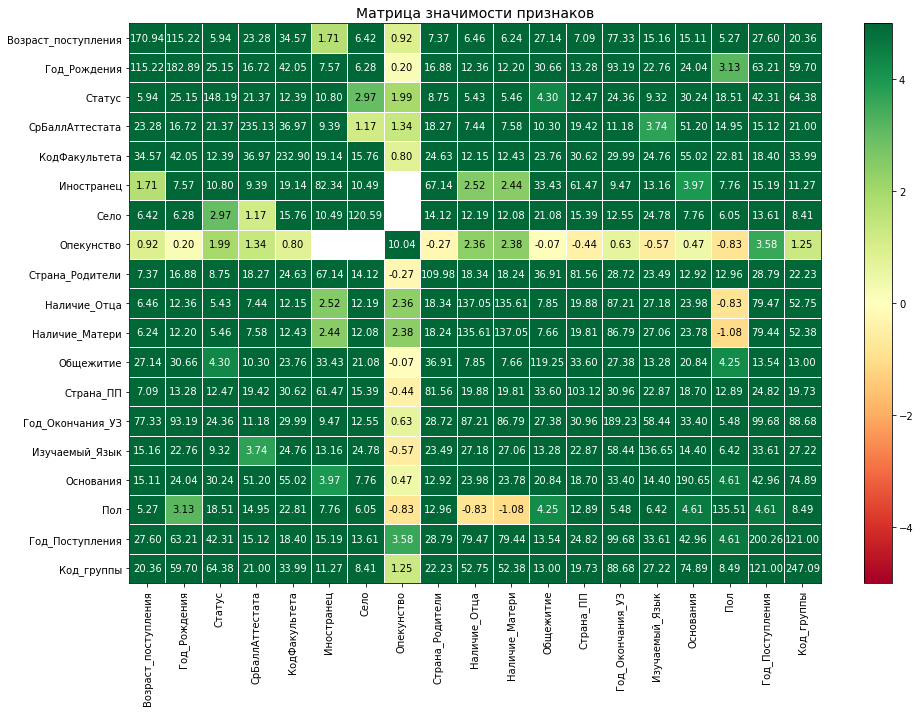

In [85]:
significance_overview = df_ordinal.significance_matrix(interval_cols=df_ordinal.columns)
plot_correlation_matrix(significance_overview.values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title='Матрица значимости признаков', 
                        usetex=False, fontsize_factor=1, figsize=(14, 10))
plt.tight_layout()

Подтверждается что признак Опекунство не является значимым для исследования. Его можно удалить. Удалим также признаки, которые, как было отмечено выше, имеют высокую корреляцию.

In [86]:
df_train_prepared = df_train_prepared.drop(['Опекунство', 
                                            'Страна_Родители', 
                                            'Страна_ПП', 
                                            'Возраст_поступления', 
                                            'Наличие_Матери'], axis=1)

In [87]:
df_train_prepared

,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Окончания_УЗ,Общежитие,Наличие_Отца,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус,Год_Рождения
0,16019,2015,Жен,ОО,Английский язык,2014,0,0,0,0,41,65,3,1998
1,14895,2010,Муж,ЦН,No,0,0,1,0,0,28,64,4,1992
2,20103,2017,Жен,ДН,Английский язык,2017,0,1,0,0,41,55,4,1999
3,19838,2017,Жен,БН,Английский язык,2017,0,1,0,0,35,72,4,1994
4,19803,2017,Жен,БН,Английский язык,2017,0,1,0,0,28,49,4,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13579,17593,2016,Муж,ОО,Английский язык,2016,0,1,0,0,34,55,3,1998
13580,19433,2015,Жен,ОО,Немецкий язык,2015,1,0,0,0,26,80,4,1997
13581,18723,2016,Муж,СН,Английский язык,2016,0,1,0,0,41,20,4,1998
13582,14663,2012,Жен,ОО,No,0,0,1,0,0,24,95,4,1995


In [88]:
# phik_corr_2 = df_train_prepared.phik_matrix()
# phik_corr_2.round(2)

In [89]:
# plot_correlation_matrix(phik_corr_2.values, 
#                         x_labels=phik_corr_2.columns, 
#                         y_labels=phik_corr_2.index, 
#                         vmin=0, vmax=1, color_map="Reds", 
#                         title=r"correlation $\phi_K$", 
#                         fontsize_factor=1, 
#                         figsize=(16, 14))
# plt.tight_layout()

In [90]:
# df_ordinal_2 = pd.DataFrame(encoder.fit_transform(df_train_prepared), columns = df_train_prepared.columns)

# global_correlation, global_labels = df_ordinal_2.global_phik(interval_cols=df_ordinal_2.columns)

# plot_correlation_matrix(global_correlation, 
#                         x_labels=[''], y_labels=global_labels, 
#                         vmin=0, vmax=1, figsize=(5,8),
#                         color_map="Reds", title=r"$g_k$",
#                         fontsize_factor=1.5)
# plt.tight_layout()

In [91]:
df_train_prepared.columns

Index(['Код_группы', 'Год_Поступления', 'Пол', 'Основания', 'Изучаемый_Язык',
       'Год_Окончания_УЗ', 'Общежитие', 'Наличие_Отца', 'Село', 'Иностранец',
       'КодФакультета', 'СрБаллАттестата', 'Статус', 'Год_Рождения'],
      dtype='object')

In [92]:
df_train_prepared.columns.values

array(['Код_группы', 'Год_Поступления', 'Пол', 'Основания',
       'Изучаемый_Язык', 'Год_Окончания_УЗ', 'Общежитие', 'Наличие_Отца',
       'Село', 'Иностранец', 'КодФакультета', 'СрБаллАттестата', 'Статус',
       'Год_Рождения'], dtype=object)

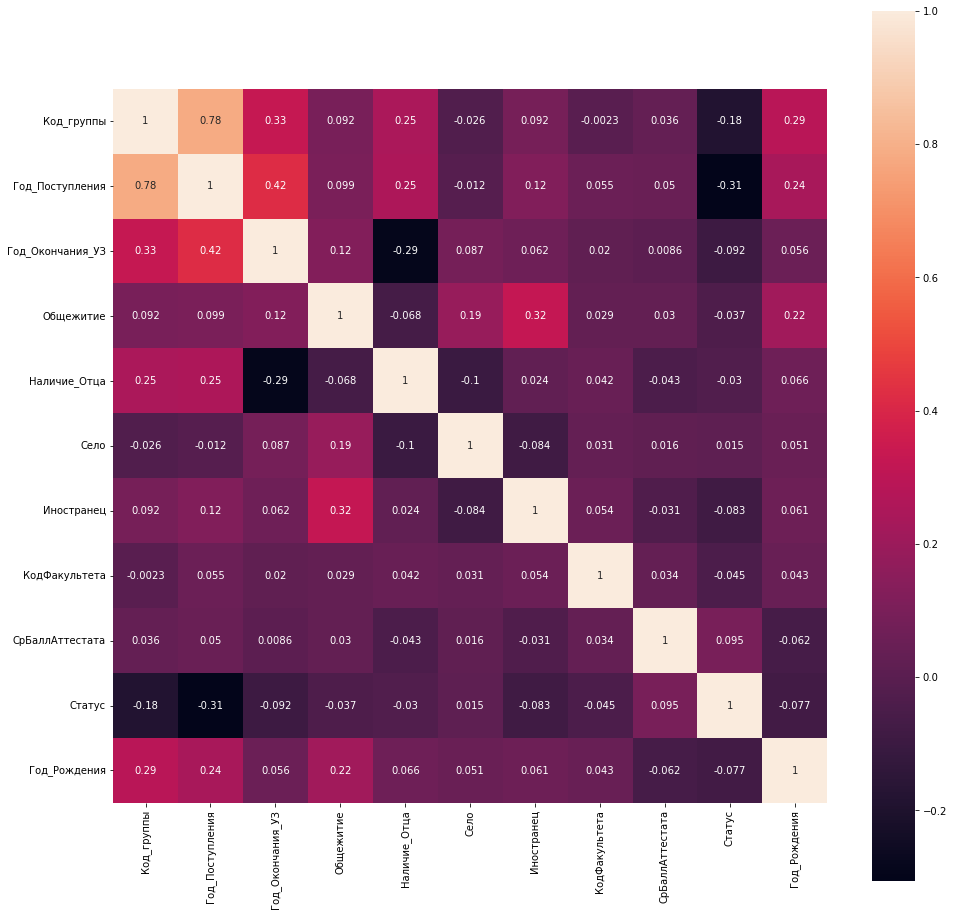

In [93]:
plt.rcParams['figure.figsize']=(16,16)

df_corr = list(df_train_prepared.columns.values)
g = sns.heatmap(df_train_prepared[df_corr].corr(), square = True, annot=True)

**Данные подготовлены к работе моделей.**

## Выделим выборки

In [94]:
# кодирование категориальных признаков
df_ohe = pd.get_dummies(df_train_prepared, drop_first=True)

In [95]:
x = df_ohe.drop('Статус', axis = 1)
y = df_ohe['Статус']

In [96]:
x.shape, y.shape

((13584, 19), (13584,))

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Масштабирование признаков

In [98]:
numeric = x.columns.tolist()
numeric

['Код_группы',
 'Год_Поступления',
 'Год_Окончания_УЗ',
 'Общежитие',
 'Наличие_Отца',
 'Село',
 'Иностранец',
 'КодФакультета',
 'СрБаллАттестата',
 'Год_Рождения',
 'Пол_Жен',
 'Пол_Муж',
 'Основания_ДН',
 'Основания_ОО',
 'Основания_СН',
 'Основания_ЦН',
 'Изучаемый_Язык_Английский язык',
 'Изучаемый_Язык_Немецкий язык',
 'Изучаемый_Язык_Французский язык']

In [99]:
pd.options.mode.chained_assignment=None
# масштабирование численных признаков
scaler = StandardScaler()

x_train[numeric] = scaler.fit_transform(x_train[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

x_train.head()

,Код_группы,Год_Поступления,Год_Окончания_УЗ,Общежитие,Наличие_Отца,Село,Иностранец,КодФакультета,СрБаллАттестата,Год_Рождения,Пол_Жен,Пол_Муж,Основания_ДН,Основания_ОО,Основания_СН,Основания_ЦН,Изучаемый_Язык_Английский язык,Изучаемый_Язык_Немецкий язык,Изучаемый_Язык_Французский язык
762,-1.204183,-0.994652,0.321270,-0.527542,-1.014621,-0.546399,-0.275555,1.719875,0.194997,0.541544,0.817893,-0.81664,-0.397795,1.291719,-0.711909,-0.124445,-1.822047,2.244287,-0.062503
13019,0.096093,0.518977,0.326366,-0.527542,0.985590,-0.546399,-0.275555,2.193036,0.845076,0.179588,-1.222654,1.22453,-0.397795,1.291719,-0.711909,-0.124445,0.548833,-0.445576,-0.062503
4556,-0.372493,0.014434,0.322969,1.895583,-1.014621,1.830163,3.629035,0.418681,1.145113,-0.725301,0.817893,-0.81664,-0.397795,1.291719,-0.711909,-0.124445,0.548833,-0.445576,-0.062503
4786,0.124325,0.518977,0.326366,-0.527542,0.985590,-0.546399,-0.275555,-0.527641,0.245003,-0.001390,0.817893,-0.81664,-0.397795,1.291719,-0.711909,-0.124445,0.548833,-0.445576,-0.062503
8953,-2.413487,-0.994652,0.319571,-0.527542,-1.014621,-0.546399,-0.275555,1.010133,-1.655230,-0.182367,0.817893,-0.81664,-0.397795,1.291719,-0.711909,-0.124445,0.548833,-0.445576,-0.062503


## Обучение модели

In [100]:
model_lr = LogisticRegression(random_state=0)#, class_weight='balanced')
model_lr.fit(x_train, y_train)
scores = cross_val_score(estimator=model_lr, X=x_train, y=y_train, cv=5)
lr_score = round(scores.mean(), 3)
print(scores)
print(f'Среднее значение cv_score: {lr_score}')

[0.78338591 0.77812829 0.7807571  0.77117307 0.77275118]
Среднее значение cv_score: 0.777


In [101]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(x_train, y_train)
scores = cross_val_score(estimator=model_rf, X=x_train, y=y_train, cv=5)
rf_score = round(scores.mean(), 3)
print(scores)
print(f'Среднее значение cv_score: {rf_score}')

[0.85594111 0.85646688 0.85594111 0.86428196 0.84271436]
Среднее значение cv_score: 0.855


In [102]:
model_cb = CatBoostClassifier(random_state=0, verbose=0)
model_cb.fit(x_train, y_train)
scores = cross_val_score(estimator=model_cb, X=x_train, y=y_train, cv=5)
cb_score = round(scores.mean(), 3)
print(scores)
print(f'Среднее значение cv_score: {cb_score}')

[0.8743428  0.88380652 0.88012618 0.88006312 0.86533403]
Среднее значение cv_score: 0.877


Лучший результат на кросс-валидации показывает модель CatBoost.

In [103]:
# %%time
# parameters = { 'n_estimators': range (100, 600, 100),
#               'max_depth': range (4,20, 4) }
# model_rf = RandomForestClassifier(random_state=0, class_weight='balanced')
# grid_rf = GridSearchCV(model_rf, parameters, scoring='f1_macro', cv=5)
# grid_rf.fit(x_train, y_train)

# display(grid_rf.best_params_)
# grid_rf.best_score_

In [104]:
%%time
# подбор оптимальных гиперпараметров
parameters = {'depth': range (4, 8, 2),
              'l2_leaf_reg': [1, 3], 
              'n_estimators': range (1500, 2600, 500)}
model_cb = CatBoostClassifier(random_state=0, verbose=False)
grid_cb = GridSearchCV(model_cb, parameters, scoring='f1_macro')
grid_cb.fit(x_train, y_train)

display(grid_cb.best_params_)
grid_cb.best_score_

{'depth': 4, 'l2_leaf_reg': 1, 'n_estimators': 2500}

Wall time: 13min 41s


0.7560172778152463

Получено значение мутрики f1 = 0.756

## Оценка точности

In [105]:
best_model = CatBoostClassifier(**grid_cb.best_params_, random_state=0, verbose=False)
best_model.fit(x_train, y_train)
predictions_cb = best_model.predict(x_test)

In [106]:
y_test.head(3)

1061     3
6482     3
10622    4
Name: Статус, dtype: int64

In [107]:
f1_score(y_test, predictions_cb, average='macro', zero_division=0)

0.7512342885872298

In [108]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Код_группы                       13584 non-null  int64
 1   Год_Поступления                  13584 non-null  int64
 2   Год_Окончания_УЗ                 13584 non-null  int32
 3   Общежитие                        13584 non-null  int32
 4   Наличие_Отца                     13584 non-null  int32
 5   Село                             13584 non-null  int32
 6   Иностранец                       13584 non-null  int32
 7   КодФакультета                    13584 non-null  int32
 8   СрБаллАттестата                  13584 non-null  int32
 9   Статус                           13584 non-null  int64
 10  Год_Рождения                     13584 non-null  int64
 11  Пол_Жен                          13584 non-null  uint8
 12  Пол_Муж                          13584 non-nul

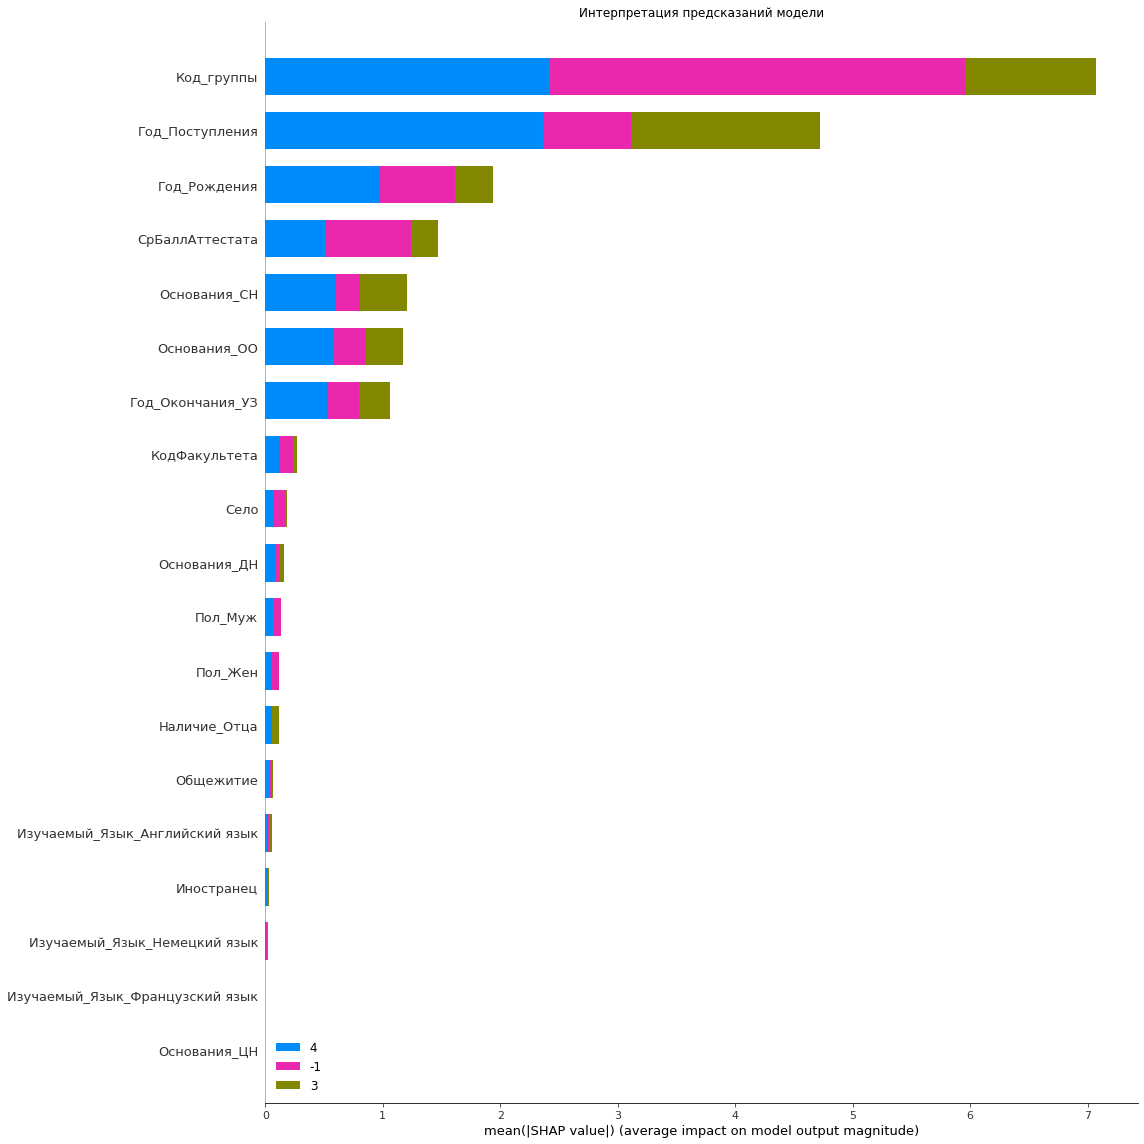

In [109]:
plt.title('Интерпретация предсказаний модели')
shap_test = shap.TreeExplainer(best_model).shap_values(df_ohe.drop('Статус',axis=1))
shap.summary_plot(shap_test, df_ohe.drop('Статус',axis=1), max_display=25, plot_size=None, class_names=best_model.classes_)

- -1 – ушел в академический отпуск
- 4 – закончил обучение
- 3 – отчислен
- 5 – призван в армию

### Вывод

- Получено значение метрики f1=0.751 у модели CatBoostClassifier с гиперпараметрами {'depth': 4, 'l2_leaf_reg': 1, 'n_estimators': 2500}

Целевой признак содержит несколько классов, один из которых (факт призыва в армию) не встречается в данном датасете. Из построенной выше интерпретации значимости для остальных классов видно разную степень влияния признаков на целевые классы.
Например, в порядке убывания значимости:
- для закончивших обучение: код группы, год поступления, год рождения, основания (ОО или СН) и средний балл аттестата;
- для ушедших в академический отпуск: код группы, средний балл аттестата, год поступления и год рождения;
- для отчисленных: год поступления, код группы, основания, год рождения и средний балл аттестата.

# Cоздание файла с ответом

In [110]:
df_test = pd.read_csv("C:/data/hackathon/altay_champ_students/test_dataset_test.csv")
df_submission = pd.read_csv("C:/data/hackathon/altay_champ_students/Алтайский_край/sample_submission.csv")

Проведём те же манипуляции с данными что и на обучении

## Рассмотрим датасет

Заменим все пропуски в данных. В столбцах, в которых по логике должны быть строковые значения заменим на No, в количественных - на 0.

In [111]:
df_obj_list = ['Пол', 'Изучаемый_Язык', 'Уч_Заведение', 'Где_Находится_УЗ', 
               'Страна_ПП', 'Регион_ПП', 'Город_ПП', 'Страна_Родители']
for data in df_obj_list:
    df_test[data] = df_test[data].fillna('No')

In [112]:
df_test = df_test.fillna(0)

In [113]:
df_test['Год_Поступления'] = df_test['Год_Поступления'].replace(2212, 2012)

In [114]:
df_test['Пол'] = df_test['Пол'].replace('муж', 'Муж')

In [115]:
df_test['Изучаемый_Язык'] = df_test['Изучаемый_Язык'].replace({'Иностранный язык (Английский)':'Английский язык', 
                                                                 'Англиийский':'Английский язык', 
                                                                 'Иностранный язык (Немецкий)':'Немецкий язык', 
                                                                 'Русский язык':'No'})

In [116]:
df_test['Год_Рождения'] = pd.to_datetime(df_test['Дата_Рождения'], format='%Y.%m.%d').dt.year

In [117]:
df_test['Возраст_поступления'] = df_test['Год_Поступления'] - pd.to_datetime(df_test['Дата_Рождения'], 
                                                                               format='%Y.%m.%d').dt.year

In [118]:
df_test['Уч_Заведение'] = df_test['Уч_Заведение'].str.replace('"', '')
df_test['Уч_Заведение'] = df_test['Уч_Заведение'].str.replace('ФГБОУ ', '')
df_test['Уч_Заведение'] = df_test['Уч_Заведение'].str.replace('ВО ', '')
df_test['Уч_Заведение'] = df_test['Уч_Заведение'].str.replace('ВПО ', '')
df_test['Уч_Заведение'] = df_test['Уч_Заведение'].str.replace('ГОУ ', '')
df_test['Уч_Заведение'] = df_test['Уч_Заведение'].str.replace('МБОУ ', '')

In [119]:
df_test = df_test.fillna(0)

In [120]:
df_test['Год_Окончания_УЗ'] = df_test['Год_Окончания_УЗ'].astype(int)

In [121]:
df_test['Страна_ПП'] = df_test['Страна_ПП'].replace({'РОССИЯ':'Россия', 
                                                       'Росссия':'Россия', 
                                                       'Кыргызстан':'Киргизия', 
                                                       'Кыргызия':'Киргизия', 
                                                       'Кыргызская Республика':'Киргизия', 
                                                       'Казахстан Респ':'Казахстан', 
                                                       'Казахстан респ':'Казахстан', 
                                                       'Республика Казахстан':'Казахстан', 
                                                       'Казахстан ВКО':'Казахстан', 
                                                       'Таджикистан Респ':'Таджикистан', 
                                                       'Республика Таджикистан':'Таджикистан'})

In [122]:
df_test['Общежитие'] = df_test['Общежитие'].astype(int)

In [123]:
df_test['Наличие_Отца'] = df_test['Наличие_Отца'].astype(int)

In [124]:
df_test['Страна_Родители'] = df_test['Страна_Родители'].replace({'Кыргызстан':'Киргизия', 
                                                                   'Кыргызская Республика':'Киргизия', 
                                                                   'Республика Казахстан':'Казахстан', 
                                                                   'казахстан':'Казахстан', 
                                                                   'КНР':'Китай', 
                                                                   'Республика Молдова':'Молдавия',
                                                                   'Республика Таджикистан':'Таджикистан'})

In [125]:
df_test['Опекунство'] = df_test['Опекунство'].astype(int)

In [126]:
df_test['Село'] = df_test['Село'].astype(int)

In [127]:
df_test['Иностранец'] = df_test['Иностранец'].astype(int)

In [128]:
df_test['КодФакультета'] = df_test['КодФакультета'].astype(int)

In [129]:
def grad_correct(row):
    points = row['СрБаллАттестата']
    if 100 < points < 1000:
        return points/10
    if points > 1000:
        return points/100
    else:
        return points

In [130]:
df_test['СрБаллАттестата'] = df_test.apply(grad_correct, axis=1)

In [131]:
df_test['СрБаллАттестата'] = df_test['СрБаллАттестата'].round(1)

In [132]:
df_test_prepared = df_test.drop(['ID', 
                                   'Дата_Рождения', 
                                   'Уч_Заведение', 
                                   'Где_Находится_УЗ', 
                                   'Пособие', 
                                   'Регион_ПП', 
                                   'Город_ПП'], axis=1)

In [133]:
max_use = max(df_test_prepared.query('5 < СрБаллАттестата')['СрБаллАттестата'])
min_use = min(df_test_prepared.query('5 < СрБаллАттестата')['СрБаллАттестата'])
max_regular = max(df_test_prepared.query('СрБаллАттестата <= 5')['СрБаллАттестата'])
min_regular = min(df_test_prepared.query('0 < СрБаллАттестата <= 5')['СрБаллАттестата'])
print(f'Максимальный балл на ЕГЭ:{max_use}')
print(f'Минимальный балл на ЕГЭ:{min_use}')
print(f'Максимальный балл не на ЕГЭ:{max_regular}')
print(f'Минимальный балл не на ЕГЭ:{min_regular}')

Максимальный балл на ЕГЭ:100.0
Минимальный балл на ЕГЭ:6.0
Максимальный балл не на ЕГЭ:5.0
Минимальный балл не на ЕГЭ:3.0


In [134]:
def grad_norm(row):
    """Функция, нормализующая средние баллы абитуриентов"""
    points = row['СрБаллАттестата']
    if 5 < points:
        return (points - min_use)/(max_use - min_use)
    else:
        return (points - min_regular)/(max_regular - min_regular)

In [135]:
df_test_prepared['СрБаллАттестата'] = df_test_prepared.apply(grad_norm, axis=1)

In [136]:
df_test_prepared['СрБаллАттестата'] = round(df_test_prepared['СрБаллАттестата']*100)
df_test_prepared['СрБаллАттестата'] = df_test_prepared['СрБаллАттестата'].astype(int)
df_test_prepared

,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Окончания_УЗ,Страна_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Год_Рождения,Возраст_поступления
0,20608,2014,Жен,ДН,Английский язык,2014,Россия,0,0,0,Россия,0,0,0,40,46,1995,19
1,20613,2015,Жен,ДН,Немецкий язык,2014,Россия,0,0,0,Россия,0,1,0,26,76,1995,20
2,21210,2018,Жен,ОО,Английский язык,1997,Россия,0,1,1,Россия,0,0,0,34,72,1973,45
3,22254,2015,Жен,ОО,Английский язык,2006,Россия,0,0,0,Россия,0,0,0,53,54,1983,32
4,15040,2012,Жен,ОО,No,0,No,0,1,1,Россия,0,0,0,36,52,1994,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6686,20680,2016,Муж,БН,Английский язык,2011,Казахстан,1,1,1,Казахстан,0,0,1,34,76,1992,24
6687,16921,2013,Жен,ОО,No,0,Россия,0,1,1,Россия,0,0,0,36,60,1995,18
6688,19400,2014,Жен,СН,Английский язык,2014,Россия,0,0,0,Россия,0,0,0,26,49,1996,18
6689,18152,2014,Муж,ОО,Немецкий язык,2014,Россия,1,0,0,Россия,0,1,0,27,67,1996,18


In [137]:
df_test_prepared = df_test_prepared.drop(['Опекунство', 
                                            'Страна_Родители', 
                                            'Страна_ПП', 
                                            'Возраст_поступления', 
                                            'Наличие_Матери'], axis=1)

In [138]:
df_test_prepared

,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Окончания_УЗ,Общежитие,Наличие_Отца,Село,Иностранец,КодФакультета,СрБаллАттестата,Год_Рождения
0,20608,2014,Жен,ДН,Английский язык,2014,0,0,0,0,40,46,1995
1,20613,2015,Жен,ДН,Немецкий язык,2014,0,0,1,0,26,76,1995
2,21210,2018,Жен,ОО,Английский язык,1997,0,1,0,0,34,72,1973
3,22254,2015,Жен,ОО,Английский язык,2006,0,0,0,0,53,54,1983
4,15040,2012,Жен,ОО,No,0,0,1,0,0,36,52,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6686,20680,2016,Муж,БН,Английский язык,2011,1,1,0,1,34,76,1992
6687,16921,2013,Жен,ОО,No,0,0,1,0,0,36,60,1995
6688,19400,2014,Жен,СН,Английский язык,2014,0,0,0,0,26,49,1996
6689,18152,2014,Муж,ОО,Немецкий язык,2014,1,0,1,0,27,67,1996


In [139]:
# кодирование категориальных признаков
df_ohe_test = pd.get_dummies(df_test_prepared, drop_first=True)

In [140]:
# pd.set_option('display.max_columns', None)

Масштабирование признаков

In [141]:
numeric = df_ohe_test.columns.tolist()
numeric

['Код_группы',
 'Год_Поступления',
 'Год_Окончания_УЗ',
 'Общежитие',
 'Наличие_Отца',
 'Село',
 'Иностранец',
 'КодФакультета',
 'СрБаллАттестата',
 'Год_Рождения',
 'Пол_Жен',
 'Пол_Муж',
 'Пол_жен',
 'Основания_ДН',
 'Основания_ЛН',
 'Основания_ОО',
 'Основания_СН',
 'Основания_ЦН',
 'Изучаемый_Язык_Английский язык',
 'Изучаемый_Язык_Английский, немецкий языки',
 'Изучаемый_Язык_Немецкий язык',
 'Изучаемый_Язык_Французский язык']

In [142]:
pd.options.mode.chained_assignment=None
# масштабирование численных признаков
scaler = StandardScaler()

df_ohe_test[numeric] = scaler.fit_transform(df_ohe_test[numeric])

df_ohe_test.head()

,Код_группы,Год_Поступления,Год_Окончания_УЗ,Общежитие,Наличие_Отца,Село,Иностранец,КодФакультета,СрБаллАттестата,Год_Рождения,Пол_Жен,Пол_Муж,Пол_жен,Основания_ДН,Основания_ЛН,Основания_ОО,Основания_СН,Основания_ЦН,Изучаемый_Язык_Английский язык,"Изучаемый_Язык_Английский, немецкий языки",Изучаемый_Язык_Немецкий язык,Изучаемый_Язык_Французский язык
0,0.910377,-0.508591,0.319050,-0.534548,-1.001346,-0.533855,-0.273605,0.873851,-0.848818,0.176337,0.826858,-0.825834,-0.012226,2.425643,-0.012226,-0.788459,-0.694462,-0.125038,0.531312,-0.012226,-0.430705,-0.064825
1,0.912359,0.004138,0.319050,-0.534548,-1.001346,1.873168,-0.273605,-0.770527,0.739704,0.176337,0.826858,-0.825834,-0.012226,2.425643,-0.012226,-0.788459,-0.694462,-0.125038,-1.882135,-0.012226,2.321775,-0.064825
2,1.148949,1.542326,0.289874,-0.534548,0.998656,-0.533855,-0.273605,0.169118,0.527901,-3.770329,0.826858,-0.825834,-0.012226,-0.412262,-0.012226,1.268297,-0.694462,-0.125038,0.531312,-0.012226,-0.430705,-0.064825
3,1.562686,0.004138,0.305320,-0.534548,-1.001346,-0.533855,-0.273605,2.400773,-0.425212,-1.976390,0.826858,-0.825834,-0.012226,-0.412262,-0.012226,1.268297,-0.694462,-0.125038,0.531312,-0.012226,-0.430705,-0.064825
4,-1.296218,-1.534050,-3.137497,-0.534548,0.998656,-0.533855,-0.273605,0.404029,-0.531114,-0.003056,0.826858,-0.825834,-0.012226,-0.412262,-0.012226,1.268297,-0.694462,-0.125038,-1.882135,-0.012226,-0.430705,-0.064825


In [143]:
df_ohe_test.head(3)

,Код_группы,Год_Поступления,Год_Окончания_УЗ,Общежитие,Наличие_Отца,Село,Иностранец,КодФакультета,СрБаллАттестата,Год_Рождения,Пол_Жен,Пол_Муж,Пол_жен,Основания_ДН,Основания_ЛН,Основания_ОО,Основания_СН,Основания_ЦН,Изучаемый_Язык_Английский язык,"Изучаемый_Язык_Английский, немецкий языки",Изучаемый_Язык_Немецкий язык,Изучаемый_Язык_Французский язык
0,0.910377,-0.508591,0.319050,-0.534548,-1.001346,-0.533855,-0.273605,0.873851,-0.848818,0.176337,0.826858,-0.825834,-0.012226,2.425643,-0.012226,-0.788459,-0.694462,-0.125038,0.531312,-0.012226,-0.430705,-0.064825
1,0.912359,0.004138,0.319050,-0.534548,-1.001346,1.873168,-0.273605,-0.770527,0.739704,0.176337,0.826858,-0.825834,-0.012226,2.425643,-0.012226,-0.788459,-0.694462,-0.125038,-1.882135,-0.012226,2.321775,-0.064825
2,1.148949,1.542326,0.289874,-0.534548,0.998656,-0.533855,-0.273605,0.169118,0.527901,-3.770329,0.826858,-0.825834,-0.012226,-0.412262,-0.012226,1.268297,-0.694462,-0.125038,0.531312,-0.012226,-0.430705,-0.064825


In [144]:
df_test_pred = best_model.predict(df_ohe_test)

In [145]:
df_submission["Статус"] = df_test_pred
df_submission.head(4)

,ID,Статус
0,64996,4
1,71837,4
2,86587,3
3,73673,-1


Создание файла с ответом:

In [146]:
df_submission.to_csv("C:/data/hackathon/altay_champ_students/Алтайский_край/submission.csv", index=False)

In [147]:
df_submission

,ID,Статус
0,64996,4
1,71837,4
2,86587,3
3,73673,-1
4,54709,4
...,...,...
6686,74342,4
6687,54876,4
6688,66879,4
6689,64982,4
